### INSTALLING DEPENDECIES

In [1]:
!pip install --upgrade pip
!pip install tensorflow opencv-python matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
asttokens               2.4.1
astunparse              1.6.3
beautifulsoup4          4.12.3
blinker                 1.8.2
bs4                     0.0.2
certifi                 2024.7.4
charset-normalizer      3.3.2
click                   8.1.7
colorama                0.4.6
comm                    0.2.2
contourpy               1.2.1
cycler                  0.12.1
debugpy                 1.8.5
decorator               5.1.1
distlib                 0.3.8
executing               2.0.1
filelock                3.15.4
filetype                1.2.0
Flask                   3.0.3
flatbuffers             24.3.25
fonttools               4.53.1
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.67.1
h5py                    3.12.1
idna                    3.7
ipykernel               6.29.5
ipython                 8.26.0
itsdangerous            2.2.0
jedi                 

In [3]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

TO REDUCE VRAM OR GPU USAGE

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

#limiting memory grwth 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### REMOVING DODGY IMAGES 
Sometimes images can be mislabelled or corrupted to solve this

In [5]:
!pip install filetype


Defaulting to user installation because normal site-packages is not writeable


In [6]:
import cv2
import filetype

def is_image(file_path):
    kind = filetype.guess(file_path)
    if kind is None:
        return False
    return kind.mime.startswith('image')

#filetype to identify if a given file is an image,
# which can be useful before processing it with cv2 (OpenCV).
# This approach provides better support and prevents deprecation warnings.

# OpenCV (cv2) - Computer Vision Library
# Features:
# 1. Image Processing: Resize, crop, color conversion, filtering.
# 2. Video Processing: Read, write, and analyze videos.
# 3. Feature Detection: Edge detection, keypoint matching (e.g., SIFT, ORB).
# 4. Object Detection: Haar cascades, pre-trained models.
# 5. Geometric Transforms: Warping, rotation, perspective changes.
# 6. Drawing: Shapes (lines, circles, etc.) and text on images.
# 7. ML/DL Integration: Use DNNs for object recognition/classification.


we remove any files less than 10kb as its too low and can be doggy images

In [7]:
data_dir='data'

In [8]:
import os #module that joins one or more path components into a single path.

data_dir = r"C:\Users\Mousam\OneDrive\Desktop\IMAGE CLASSFIER\data"  # Replace with your directory path 
#pointing to our data directory
files = os.listdir(os.path.join(data_dir, 'happy')) #looping throug every image from the sub flder happy
print(files)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Mousam\\OneDrive\\Desktop\\IMAGE CLASSFIER\\data\\happy'

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
image_exts[0]

'jpeg'

### EXPLAINING TO MYSELF ABOUT THE PACKAGES

In [ ]:
for image_class in os.listdir(data_dir):
    print (image_class)
    
    #runs through the data directory for hence returns happy and sad 
    #now we can go use this to loop through the subdirectorries (i.e sad and happy all the images) 
    

happy
sad


In [ ]:
img = cv2.imread(os.path.join('data', 'happy', 'images17.jpg' )) #loading the img to show that this func is used to loop through

In [ ]:
img.shape #means coloured img


(182, 277, 3)

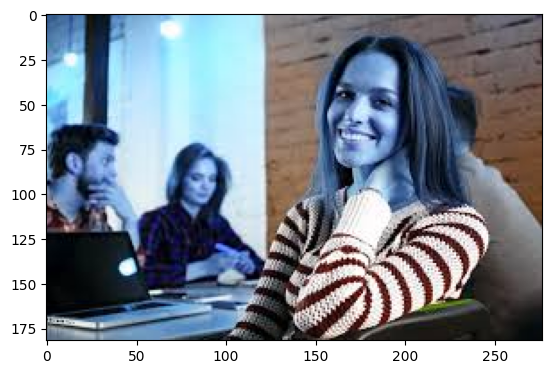

In [ ]:
plt.imshow(img) #img is weird coz read by matplotlib in GBR color

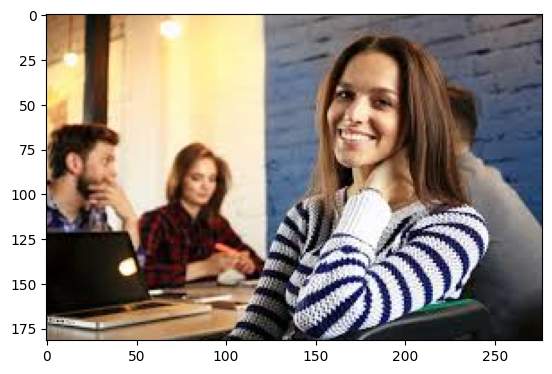

In [ ]:
#fixing the above problem 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
type(img) # we get the img as numpy array it means

numpy.ndarray

### MAIN FUCNTION TO LOOP THROUGH THE IMGS AND REMOVING DODGY IMAGS

#### DODGY IMAGES REMOVING SCRIPTS 
 images that are suspicious, low-quality, or problematic, Hence we create a extnsion list mentioning what valid files should be acessed.   

In [ ]:
for image_class in os.listdir(data_dir):  # Loop through categories (e.g., happy/sad)
    for image in os.listdir(os.path.join(data_dir, image_class)):  # Loop through images
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)  # Open image using OpenCV
            tip = imghdr.what(image_path)  # Check if it's a valid image format
            if tip not in image_exts:
                print('Image not in the extension list: {}'.format(image_path))
                os.remove(image_path)  # Remove dodgy image
        except Exception as e:
            print('Issue with the image: {}'.format(image_path))        
    

Issue with the image: C:\Users\Mousam\OneDrive\Desktop\IMAGE CLASSFIER\data\happy\05-12-21-happy-people.jpg
Issue with the image: C:\Users\Mousam\OneDrive\Desktop\IMAGE CLASSFIER\data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with the image: C:\Users\Mousam\OneDrive\Desktop\IMAGE CLASSFIER\data\happy\1-2.jpg
Issue with the image: C:\Users\Mousam\OneDrive\Desktop\IMAGE CLASSFIER\data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with the image: C:\Users\Mousam\OneDrive\Desktop\IMAGE CLASSFIER\data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with the image: C:\Users\Mousam\OneDrive\Desktop\IMAGE CLASSFIER\data\happy\154006829.jpg
Issue with the image: C:\Users\Mousam\OneDrive\Desktop\IMAGE CLASSFIER\data\happy\170404-happy-workers-feature.jpg
Issue with the image: C:\Users\Mousam\OneDrive\Desktop\IMAGE CLASSFIER\data\happy\1902539.jpg
Issue with the image: C:\Users\Mousam\OneDrive\Desktop\IMAGE CLASSFIER\data\happy\1902540.jpg
Issue with the image:

Hence, all the dodgy images are cleared now..

In [ ]:
help(tf.data.Dataset) 


Help on class DatasetV2 in module tensorflow.python.data.ops.dataset_ops:

class DatasetV2(collections.abc.Iterable, tensorflow.python.trackable.base.Trackable, tensorflow.python.framework.composite_tensor.CompositeTensor, tensorflow.python.types.data.DatasetV2)
 |  DatasetV2(variant_tensor)
 |
 |  Represents a potentially large set of elements.
 |
 |  The `tf.data.Dataset` API supports writing descriptive and efficient input
 |  pipelines. `Dataset` usage follows a common pattern:
 |
 |  1. Create a source dataset from your input data.
 |  2. Apply dataset transformations to preprocess the data.
 |  3. Iterate over the dataset and process the elements.
 |
 |  Iteration happens in a streaming fashion, so the full dataset does not need to
 |  fit into memory.
 |
 |  Source Datasets:
 |
 |  The simplest way to create a dataset is to create it from a python `list`:
 |
 |  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
 |  >>> for element in dataset:
 |  ...   print(element)
 

### LOADING THE DATASETS

In [ ]:
tf.data.Dataset
#API supports writing descriptive and efficient input pipelines.


tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt

1. Building our data pipeline

In [ ]:
data = tf.keras.utils.image_dataset_from_directory ('data')

# Loads images from a directory and returns a `tf.data.Dataset` for training.
# It assumes images are organized in subdirectories, each representing a class.
# Auto fucntion of keras as it makes bacthes auto and classes as well
# build img Dataset and does preprocessing as well

Found 160 files belonging to 2 classes.


In [ ]:
data 
# cant fetch like the data[0] X 
# as it is a generator so we create a Iterator

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

2. Acessing our data pipeline

In [ ]:
data_iterator = data.as_numpy_iterator()
# allows to access data from the pipeline

Note to self : 
A data pipeline refers to a series of processes or steps used to collect, process, and deliver data from one system or source to another. It ensures that data flows efficiently from various raw sources to where it can be used for analysis, training models, or other applications.

3. Getting Batches (ez for significantly high batches)

In [ ]:
#getting another batch from the iterator by re running this cell
batch = data_iterator.next()

### VISUALIZATION

Two batches of our dataset hence two parts: 
[0] part is images from directory as np.array and
[1] labels of these images happy or sad

In [ ]:
len(batch) 

2

In [ ]:
batch[0]

array([[[[1.14694138e+02, 1.18694138e+02, 1.21563675e+02],
         [1.14113281e+02, 1.20113281e+02, 1.20113281e+02],
         [1.16326157e+02, 1.22326157e+02, 1.22326157e+02],
         ...,
         [2.10000000e+01, 3.00000000e+01, 3.70000000e+01],
         [1.90000000e+01, 2.80000000e+01, 3.50000000e+01],
         [1.93710938e+01, 3.03710938e+01, 3.23710938e+01]],

        [[1.13628906e+02, 1.16000000e+02, 1.26886719e+02],
         [1.16886719e+02, 1.22886719e+02, 1.22886719e+02],
         [1.21238281e+02, 1.27238281e+02, 1.27238281e+02],
         ...,
         [2.10000000e+01, 3.00000000e+01, 3.70000000e+01],
         [2.10000000e+01, 3.00000000e+01, 3.70000000e+01],
         [1.82578125e+01, 2.92578125e+01, 3.12578125e+01]],

        [[1.16000000e+02, 1.19742188e+02, 1.26371094e+02],
         [1.16886719e+02, 1.21886719e+02, 1.27886719e+02],
         [1.18000000e+02, 1.23000000e+02, 1.29000000e+02],
         ...,
         [2.10000000e+01, 3.00000000e+01, 3.70000000e+01],
         [

In [ ]:
batch[0].shape 
#32 batches  as used in tf.keras.util We can change this accordingly

(32, 256, 256, 3)

In [ ]:
batch[1] 
#0 is happy or sad 
#1 is sad or happy

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int32)

To get which label is happy and sad we run the following script of pyplot
we figure out which class is assisgned to which image

**Displaying a batch of images in a grid using Matplotlib.**

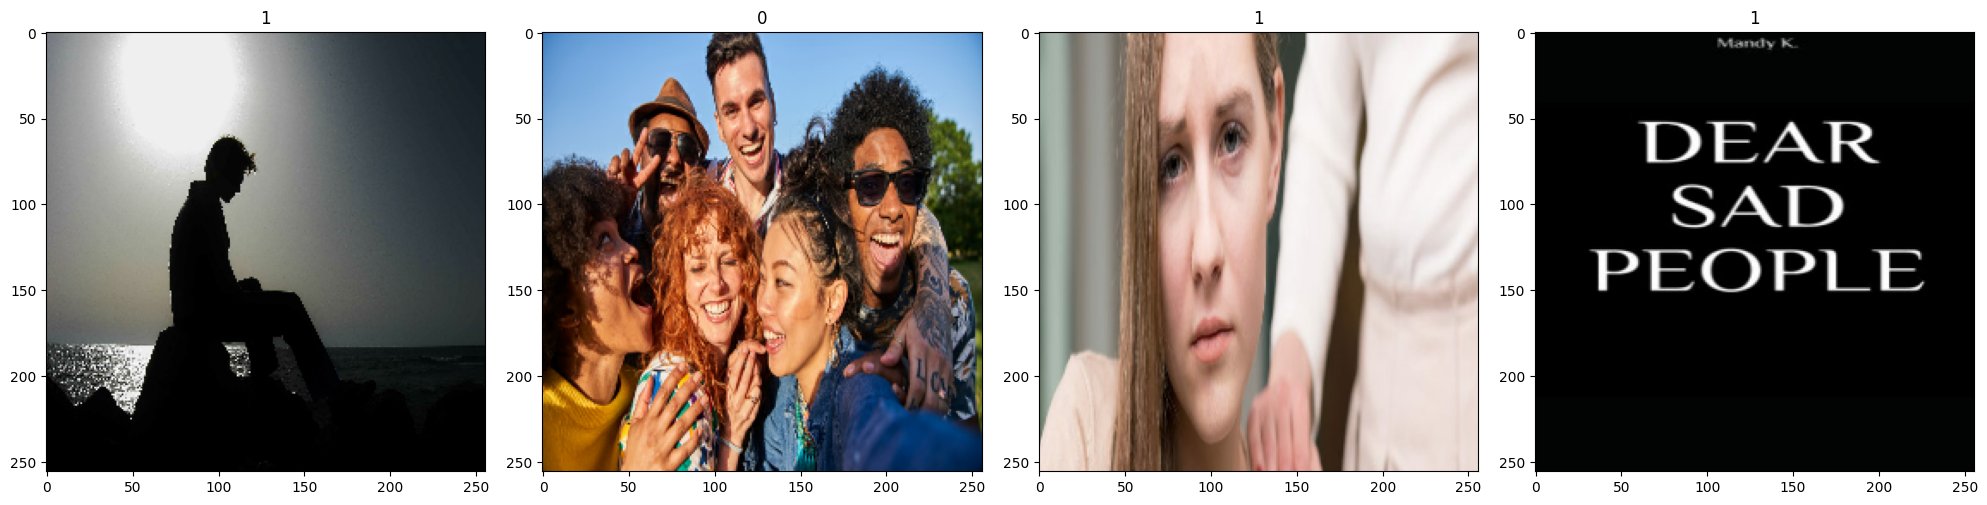

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 30))  # Create 4 subplots

for idx, img in enumerate(batch[0][:4]):  # Loop over the first 4 images in the batch
    ax[idx].imshow(img.astype('uint8'))  # Convert image to uint8 (for display)
    ax[idx].set_title(batch[1][idx])  # Set the title with corresponding label

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

- You are working with 32 colored images in a batch.
- Each image has a resolution of 256x256 pixels.
- This is a common shape for input tensors in image processing and deep learning tasks (e.g., CNNs)

In [ ]:
batch[0].max() #max pixel value 255 and min 0

np.float32(255.0)

### PREPROCESSING  DATA

process of cleaning, transforming, and organizing raw data into a usable format for analysis or machine learning models. It ensures that the data is accurate, consistent, and suitable for the task at hand, improving the quality of results.

1. Scale Data (Normalization)

Pixel values of images typically range from 0 to 255 (in 8-bit images).
Dividing by 255 scales them to a range of [0, 1], which is easier for neural networks to process and speeds up training.

- Neural networks perform better with inputs that are within a small range (e.g., [0, 1] or [-1, 1]).
- Normalization avoids large gradients, helps with faster convergence, and ensures consistent scaling across input features.


In [ ]:
data = data.map(lambda x,y: (x/255, y))



` data.map `
- Applies a function to each element of the dataset.
- In this case, the function is a lambda function: lambda x, y: (x/255, y).

` lambda x, y: (x/255, y) `
- x: Represents the input data (e.g., an image).
- y: Represents the corresponding label.

` (x/255, y) `

The image data (x) is divided by 255 to normalize pixel values to the range [0, 1], while the labels (y) are left unchanged.

In [ ]:
data.as_numpy_iterator().next()[0].max()

np.float32(1.0)

In [ ]:
data.as_numpy_iterator().next()[0].min()

np.float32(0.0)

2. DATA SPLIT

In [ ]:
len(data)

5

Below is the  *Standard* for splitting data 

- 70% Training: Ensures the model has enough data to learn patterns.
- 20% Validation: Helps tune hyperparameters and prevent overfitting.
- 10% Test: Evaluates the model's performance on unseen data.


In [ ]:
train_size =int(len(data)*.7)
val_size =  int(len(data)*.2)
test_size = int (len(data)*.1)+1

In [ ]:
train = data.take(train_size) # First 3 elements
val = data.skip(train_size).take(val_size) # nxt 1 element 
test = data.skip(train_size + val_size).take(test_size) # nxt 1 element

In [ ]:
len(test)

1

3. ### DEEP LEARNING MODEL

- Importing simple APIs from keras to build simple **AI Architecture** 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

- Sequential is a class in TensorFlow's Keras API used to create a linear stack of layers for a deep learning model.
- Conv2D: Extracts spatial features.
- MaxPooling2D: Reduces feature map size.
- Dense: Learns complex relationships.
- Flatten: Prepares data for Dense layers.
- Dropout: Prevents overfitting.

### Convolution:
It is a mathematical operation that combines two functions (or datasets) to produce a third function that highlights specific patterns or features. In the context of deep learning and image processing, convolution is used to extract spatial features like edges, textures, and shapes from input data, such as images, by sliding a small filter (kernel) across the input and computing a weighted sum at each position.

This operation forms the foundation of Convolutional Neural Networks (CNNs), enabling them to identify patterns and features crucial for tasks like image recognition and object detection.

### How Convolution Works:

#### **1. Input:**
- Usually an image represented as a grid of pixel values:
  - **2D** for grayscale images.
  - **3D** for color images (including RGB channels).

#### **2. Kernel (Filter):**
- A small matrix of numbers (e.g., `3x3` or `5x5`) that slides over the input image.
- The kernel values define the type of feature to extract:
  - Example: Detect edges, sharpen details, or blur the image.

#### **3. Operation:**
- At each position:
  1. The kernel multiplies its values element-wise with the overlapping input values (**dot product**).
  2. The results are summed to produce a single value.
- The output value becomes a pixel in the resulting feature map.

#### **4. Feature Map:**
- The matrix generated after sliding the kernel across the input.
- Highlights specific patterns like edges, corners, or textures in the image.


In [ ]:
model = Sequential()

In [ ]:
# First Conv2D layer with 16 filters, 3x3 kernel size, ReLU activation
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# Second Conv2D layer with 32 filters, 3x3 kernel size, ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

# Third Conv2D layer with 16 filters, 3x3 kernel size, ReLU activation
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

# Flatten the output to connect to fully connected layers
model.add(Flatten())

# Dense layer with 256 units, ReLU activation
model.add(Dense(256, activation='relu'))

# Output layer with 1 unit for binary classification, Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

### Differences Between Sigmoid and ReLU Activation Functions:

1. **Output Range:**
   - **Sigmoid:** Outputs values between **0 and 1**, suitable for probabilistic interpretations (e.g., binary classification).
   - **ReLU:** Outputs values from **0 to ∞**, with negative inputs becoming **0**.

2. **Gradient Behavior:**
   - **Sigmoid:** Can suffer from the **vanishing gradient problem** for large positive or negative inputs (gradients near 0 or 1 become very small).
   - **ReLU:** Avoids the vanishing gradient issue, maintaining a constant gradient of 1 for positive inputs.

3. **Computational Efficiency:**
   - **Sigmoid:** Requires more computation due to its exponential function ` sigma(x) = 1/1+e^-x`
   - **ReLU:** Computationally simpler expressed as `f(x) = max(0,x) ` 

### Summary:
- **Sigmoid** is ideal for output layers in binary classification, whereas **ReLU** is commonly used in hidden layers of deep networks for faster and more effective training.


In [ ]:
model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### TRAINING THE MODEL

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(
    train,                   # Training labels (e.g., class labels for classification)
    epochs=20,                  # Number of epochs to train the model
    validation_data= val,          #Validation data (features, labels) for evaluation during training
    batch_size =32,     
    callbacks=[tensorboard_callback]  # Callback for TensorBoard logging
)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5104 - loss: 0.9229 - val_accuracy: 0.3438 - val_loss: 0.8029
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.4349 - loss: 0.7621 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5547 - loss: 0.6919 - val_accuracy: 0.6562 - val_loss: 0.6526
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5247 - loss: 0.6687 - val_accuracy: 0.4688 - val_loss: 0.6645
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5781 - loss: 0.6366 - val_accuracy: 0.5312 - val_loss: 0.6620
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5833 - loss: 0.5902 - val_accuracy: 0.7812 - val_loss: 0.5134
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7747 - loss: 0.5485 - val_accuracy: 0.7812 - val_loss: 0.5054
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8372 - loss: 0.4483 - val_accuracy: 0.6875 - val_loss: 0.4655
Epoch 9/20
3/3 

### Interpretation:
- Training Accuracy: 1.0000 (100% accuracy)
- Validation Accuracy: 1.0000 (100% accuracy)
- Training Loss: 0.0406 (low)
- Validation Loss: 0.0163 (very low)

This suggests that your model has learned to predict the target variable with perfect accuracy, meaning it is likely overfitting. Overfitting occurs when a model performs exceptionally well on the training data but may struggle to generalize to new, unseen data.

Plotting Performance

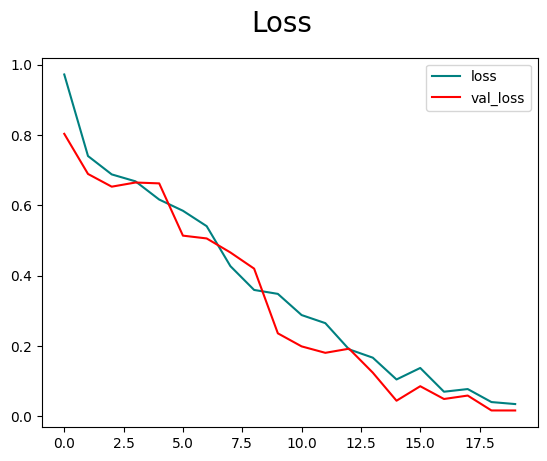

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'red', label = "val_loss")
fig.suptitle('Loss',  fontsize =20)
plt.legend(loc='upper right')
plt.show()